In [3]:
from rocketpy import Environment, Rocket, SolidMotor, Flight

Env = Environment(
    railLength=5.2,
    latitude=32.990254,
    longitude=10.974998,
    elevation=100,
    date=(2022, 9, 7, 12) # Tomorrow's date in year, month, day, hour UTC format
) 

Env.setAtmosphericModel(type='Forecast', file='GFS')




In [4]:
Pro75M1670 = SolidMotor(
    thrustSource="C:\\Users\\15124\\Downloads\\AeroTech_H73J.eng",
    burnOut=3.5207,
    grainNumber=5,
    grainSeparation=5/1000,
    grainDensity=1815,
    grainOuterRadius=33/1000,
    grainInitialInnerRadius=15/1000,
    grainInitialHeight=120/1000,
    nozzleRadius=33/1000,
    throatRadius=11/1000,
    interpolationMethod='linear'
)

In [5]:
Calisto = Rocket(
    motor=Pro75M1670,
    radius=0.03937,
    mass=1,
    inertiaI=0.002454,
    inertiaZ=0.002429,
    distanceRocketNozzle=-(35/1000),
    distanceRocketPropellant=-(17.5/1000),
    powerOffDrag="C:\\Users\\15124\\Desktop\\Test_Data\\engineoffdata.csv",
    powerOnDrag="C:\\Users\\15124\\Desktop\\Test_Data\\engineondata.csv"
)

Calisto.setRailButtons([0.2, -0.4])

NoseCone = Calisto.addNose(length=0.286, kind="vonKarman", distanceToCM=0.801)

FinSet = Calisto.addFins(4, span=0.073, rootChord=0.216, tipChord=0.031, distanceToCM=-0.585)



In [6]:
def mainTrigger(p, y):
    return True if y[5] < 0 else False

Main = Calisto.addParachute('Main',
                            CdS=0.7,
                            trigger=mainTrigger, 
                            samplingRate=105,
                            lag=1.5,
                            noise=(0, 8.3, 0.5))

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 63.43 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: 2.29 m/s
Lateral Surface Wind Speed: -0.40 m/s


 Rail Departure State

Rail Departure Time: 0.932 s
Rail Departure Velocity: 13.611 m/s
Rail Departure Static Margin: 4.395 c
Rail Departure Angle of Attack: 9.815°
Rail Departure Thrust-Weight Ratio: 3.391
Rail Departure Reynolds Number: 6.297e+04


BurnOut State

BurnOut time: 2.953 s
Altitude at burnOut: 90.942 m (AGL)
Rocket velocity at burnOut: 54.945 m/s
Freestream velocity at burnOut: 55.048 m/s
Mach Number at burnOut: 0.156
Kinetic energy at burnOut: 1.510e+03 J


Apogee

Apogee

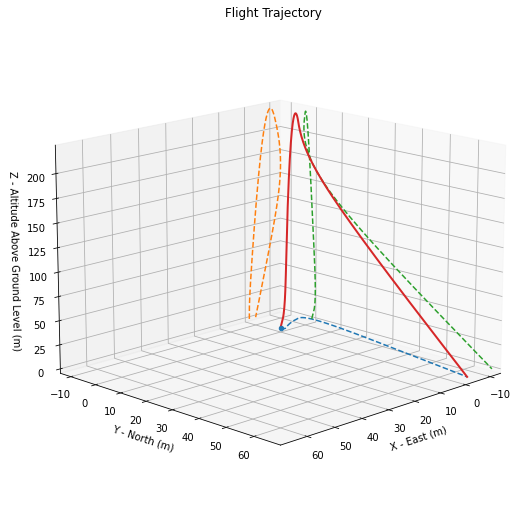



Trajectory Kinematic Plots



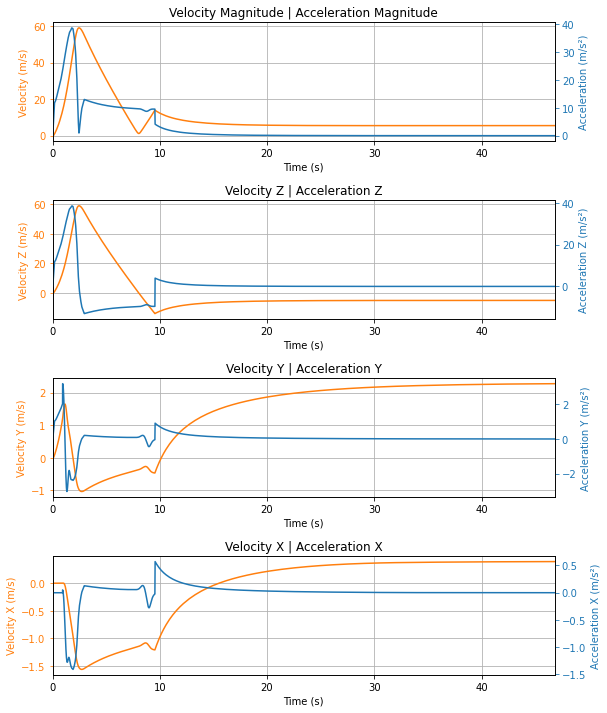



Angular Position Plots



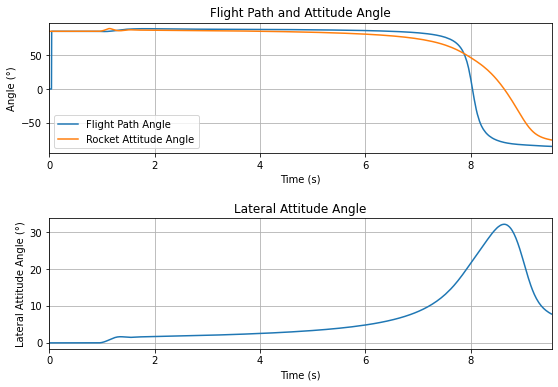



Path, Attitude and Lateral Attitude Angle plots



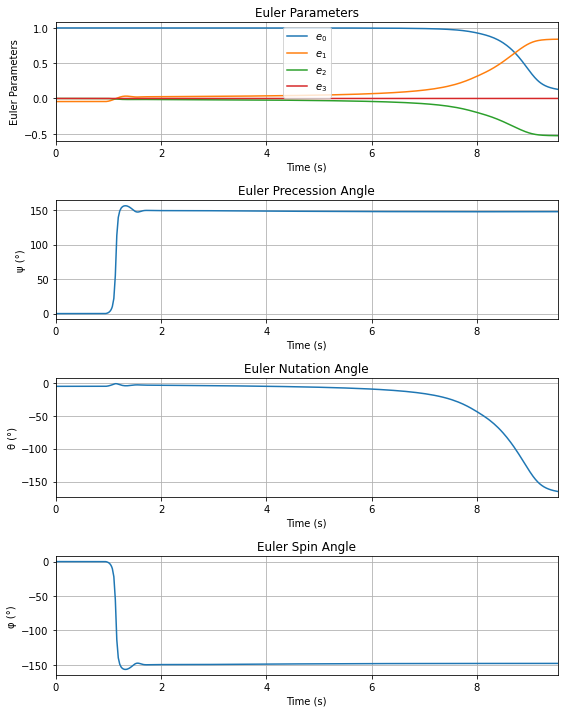



Trajectory Angular Velocity and Acceleration Plots



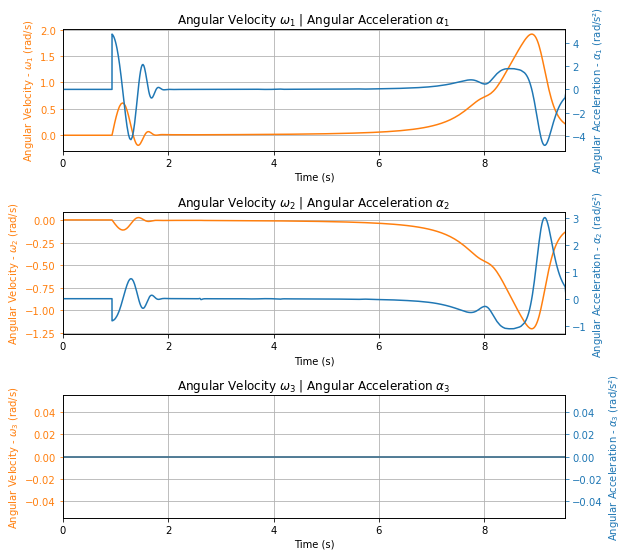



Trajectory Force Plots



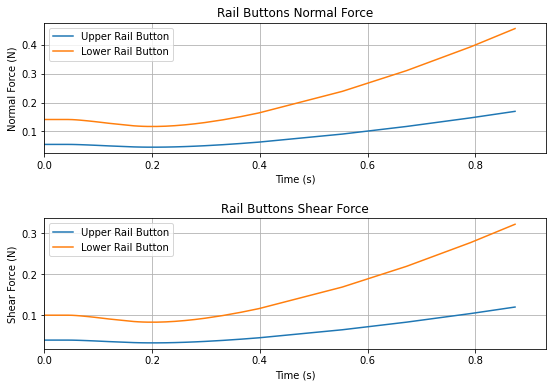

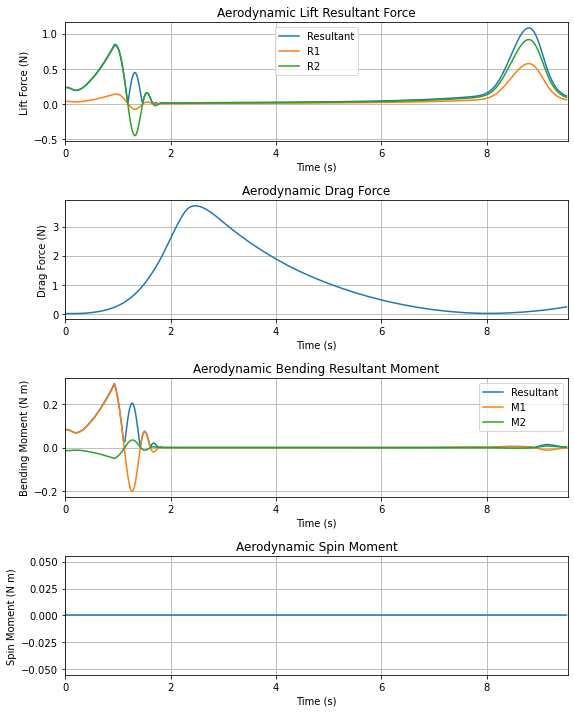



Trajectory Energy Plots



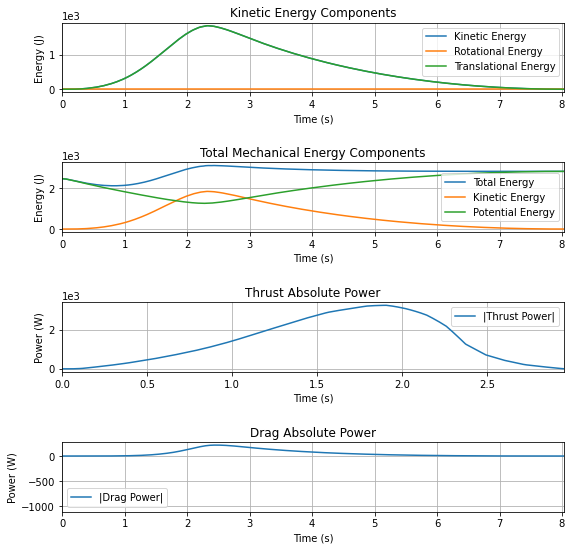



Trajectory Fluid Mechanics Plots



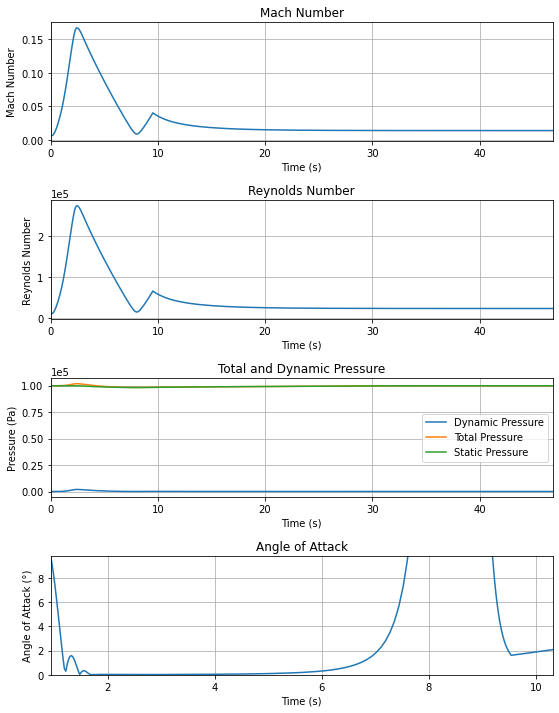



Trajectory Stability and Control Plots



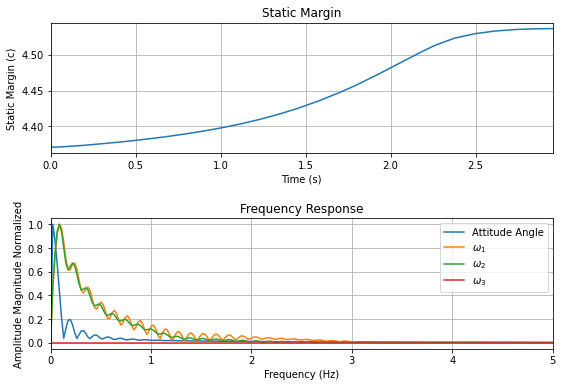

In [7]:


TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0)


TestFlight.allInfo()

In [12]:
#make a equation for this
v_linestretch = 14.296
staticdrag = (1/2) * Main.CdS * v_linestretch**(2)
print(staticdrag)

71.53146559999999
